In [1]:
from xcube.core.store import find_data_store_extensions
from xcube.core.store import get_data_store_params_schema
from xcube.core.store import new_data_store

# Utilities for notebook visualization
import shapely.geometry
import IPython.display
from IPython.display import JSON
import matplotlib.pyplot as plt

In [2]:
JSON({e.name: e.metadata for e in find_data_store_extensions()})

<IPython.core.display.JSON object>

In [3]:
get_data_store_params_schema('smos')

In [4]:
store = new_data_store('smos')

In [5]:
store.get_open_data_params_schema()

In [6]:
JSON(store.list_data_ids())

<IPython.core.display.JSON object>

In [11]:
%%timeit -n 1 -r 1
ds = store.open_data("SMOS-L2-SM", time_range=("2023-05-01", "2023-05-02"))

c:\users\norma\projects\xcube-smos\xcube_smos\l2cube.py:67: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  self.time_bnds = xr.DataArray(
c:\users\norma\projects\xcube-smos\xcube_smos\l2cube.py:71: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by 

9.01 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [12]:
ds

<xarray.Dataset>
Dimensions:            (lat: 8064, lon: 16384, time: 13, bnds: 2)
Coordinates:
  * lat                (lat) float64 88.58 88.56 88.54 ... -88.54 -88.56 -88.58
  * lon                (lon) float64 -180.0 -180.0 -179.9 ... 179.9 180.0 180.0
  * time               (time) datetime64[ns] 2023-05-01T01:54:46 ... 2023-05-...
    time_bnds          (time, bnds) datetime64[ns] 2023-05-01T01:28:09 ... 20...
Dimensions without coordinates: bnds
Data variables:
    Chi_2              (time, lat, lon) float64 dask.array<chunksize=(1, 504, 512), meta=np.ndarray>
    Chi_2_P            (time, lat, lon) float64 dask.array<chunksize=(1, 504, 512), meta=np.ndarray>
    N_RFI_X            (time, lat, lon) float64 dask.array<chunksize=(1, 504, 512), meta=np.ndarray>
    N_RFI_Y            (time, lat, lon) float64 dask.array<chunksize=(1, 504, 512), meta=np.ndarray>
    RFI_Prob           (time, lat, lon) float64 dask.array<chunksize=(1, 504, 512), meta=np.ndarray>
    Soil_Moisture      (time, lat, lon) float32 dask.array<chunksize=(1, 504, 512), meta=np.ndarray>
    Soil_Moisture_DQX  (time, lat, lon) float32 dask.array<chunksize=(1, 504, 512), meta=np.ndarray>
Attributes: (12/439)
    FH:File_Class:                                                           ...
    FH:File_Description:                                                     ...
    FH:File_Name:                                                            ...
    FH:File_Type:                                                            ...
    FH:File_Version:                                                         ...
    FH:Mission:                                                              ...
    ...                                                                                                                         ...
    VH:SPH:QI:Percentage_Rejected_TBs:Due_To_TB_Range:                       ...
    VH:SPH:QI:Total_L1c_Nodes:                                               ...
    VH:SPH:QI:Total_Processed_L1c_Nodes:                                     ...
    VH:SPH:QI:Total_Retrieval_Attempted_L1c_Nodes:                           ...
    creation_date:                                                           ...
    total_number_of_grid_points:                                             ...

In [13]:
ds.Soil_Moisture

<xarray.DataArray 'Soil_Moisture' (time: 13, lat: 8064, lon: 16384)>
dask.array<where, shape=(13, 8064, 16384), dtype=float32, chunksize=(1, 504, 512), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 88.58 88.56 88.54 88.52 ... -88.54 -88.56 -88.58
  * lon      (lon) float64 -180.0 -180.0 -179.9 -179.9 ... 179.9 180.0 180.0
  * time     (time) datetime64[ns] 2023-05-01T01:54:46 ... 2023-05-01T21:55:40
Attributes:
    units:       m3 m-3
    _FillValue:  -999.0

1.78 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


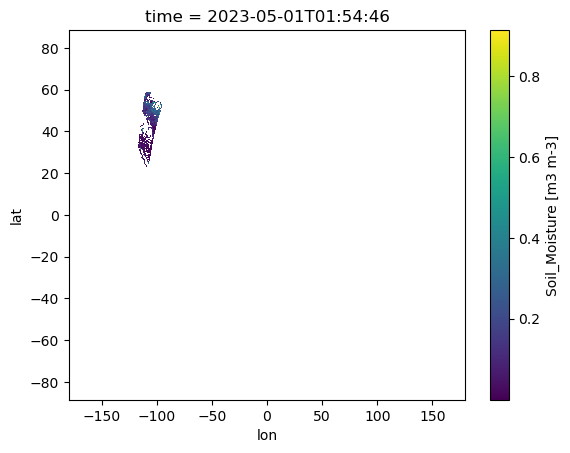

In [16]:
%%timeit -n 1 -r 1
ds.Soil_Moisture.isel(time=0).plot.imshow()

Using the `lazy_load=True` setting forces lazy (deferred) loading of variable data of the SMOS L2 products.
Variable data is only loaded on demand. This saves CPU and memory when opening the data cube from the store.
However, this mode will not work with `dask.distributed` using multi-processes or using a cluster as 
indicated by the emitted warnings.

In [15]:
%%timeit -n 1 -r 1
ds = store.open_data("SMOS-L2-SM", time_range=("2023-05-01", "2023-05-02"), lazy_load=True)

c:\users\norma\projects\xcube-smos\xcube_smos\l2cube.py:67: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  self.time_bnds = xr.DataArray(
c:\users\norma\projects\xcube-smos\xcube_smos\l2cube.py:71: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by 

2.54 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


1.84 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


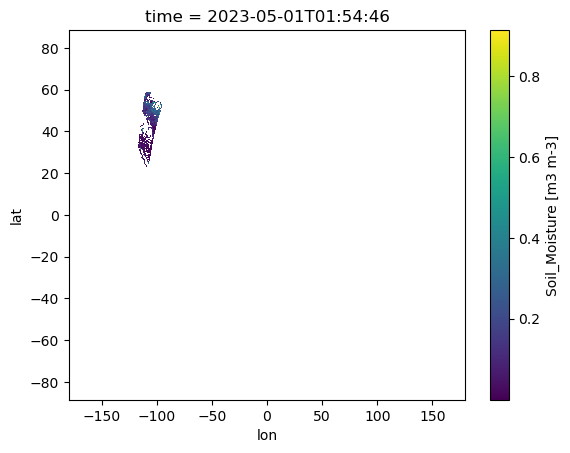

In [17]:
%%timeit -n 1 -r 1
ds.Soil_Moisture.isel(time=0).plot.imshow()

16.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


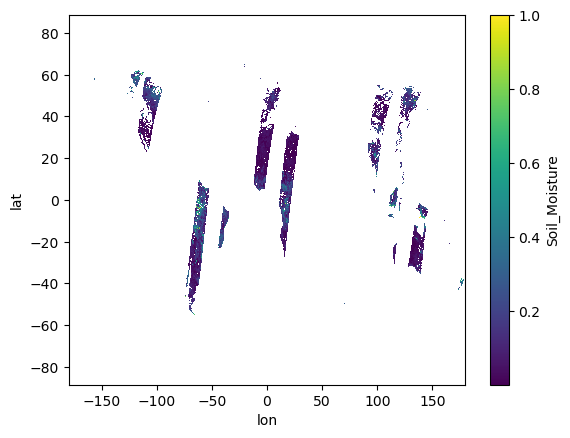

In [18]:
%%timeit -n 1 -r 1
ds.Soil_Moisture.mean("time").plot.imshow()